# Financial Market Analysis Project using NSEpy
A simple project for analyzing Nifty 50 stocks using NSEpy and Python libraries.

In [1]:
from nsepy import get_history
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Step 1: Download stock data using nsepy
stocks = ['RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK']
stock_data = {}

for stock in stocks:
    data = get_history(symbol=stock, start=date(2020, 1, 1), end=date(2024, 12, 31))
    data['Stock'] = stock
    stock_data[stock] = data

In [3]:
# Combine all data into a single DataFrame
combined_data = pd.concat(stock_data.values())
combined_data.reset_index(inplace=True)

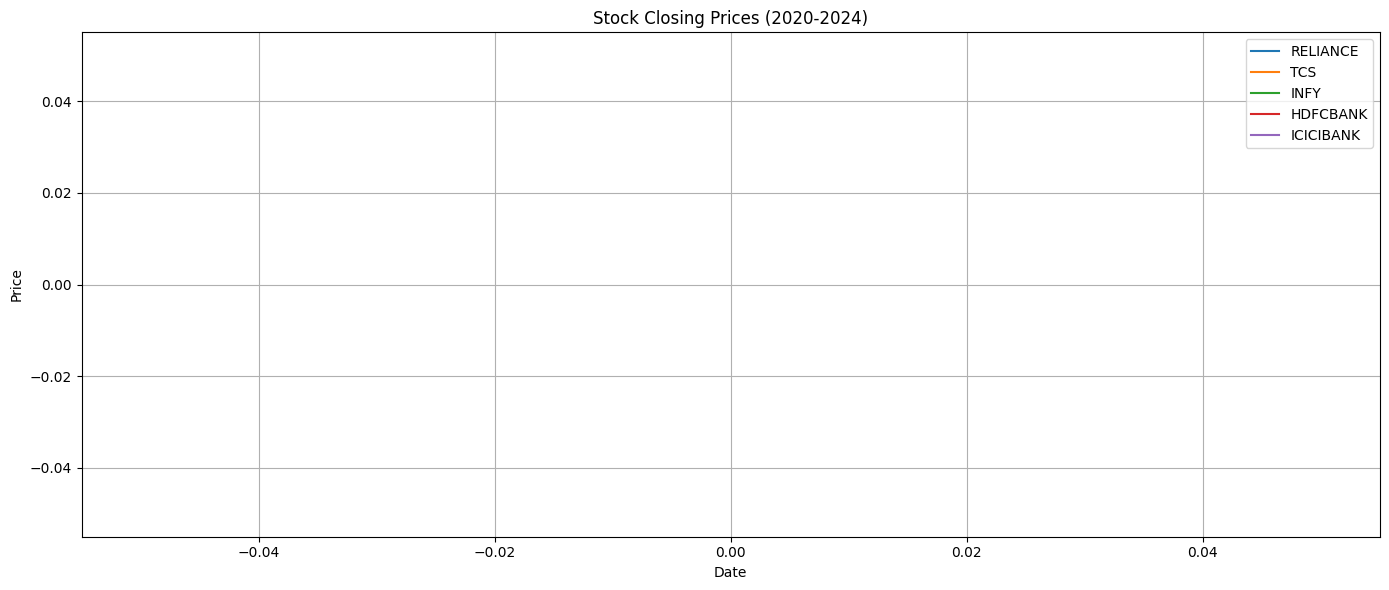

In [4]:
# Step 2: Plot Closing Prices
plt.figure(figsize=(14, 6))
for stock in stocks:
    subset = combined_data[combined_data['Stock'] == stock]
    plt.plot(subset['Date'], subset['Close'], label=stock)
plt.title('Stock Closing Prices (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

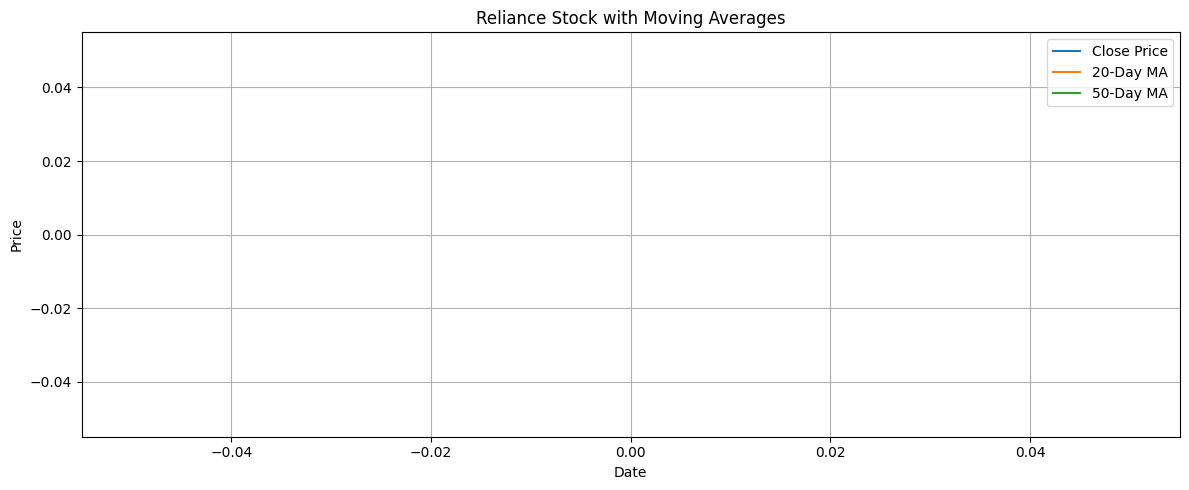

In [5]:
# Step 3: Moving Average for RELIANCE
plt.figure(figsize=(12, 5))
reliance = stock_data['RELIANCE']
reliance['MA20'] = reliance['Close'].rolling(window=20).mean()
reliance['MA50'] = reliance['Close'].rolling(window=50).mean()
plt.plot(reliance.index, reliance['Close'], label='Close Price')
plt.plot(reliance.index, reliance['MA20'], label='20-Day MA')
plt.plot(reliance.index, reliance['MA50'], label='50-Day MA')
plt.title('Reliance Stock with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

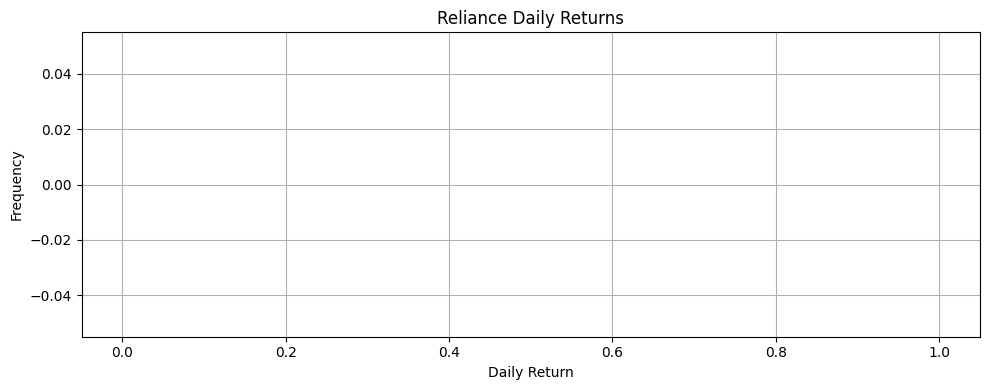

In [6]:
# Step 4: Daily Returns
reliance['Daily Return'] = reliance['Close'].pct_change()
plt.figure(figsize=(10, 4))
reliance['Daily Return'].hist(bins=50)
plt.title('Reliance Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [7]:
# Step 5: Predictive Modeling
reliance = reliance.dropna()
X = np.array(range(len(reliance))).reshape(-1, 1)
y = reliance['Close'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(X_test, y_test, label='Actual Prices')
plt.plot(X_test, y_pred, label='Predicted Prices', linestyle='--')
plt.title('Reliance Stock Price Prediction using Linear Regression')
plt.xlabel('Days Since Start')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [8]:
# Step 6: Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

NameError: name 'y_test' is not defined